Roshni Scratch Notebook

In [4]:
# Import Packages and Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

%matplotlib inline

data = pd.read_csv('data/kc_house_data.csv')

# Preliminary Exploration of Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [6]:
df = data.drop(labels = ['id', 'date', 'address', 'lat', 'long', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', ], axis=1)

* Definitely unnecessary columns = id, date (sold)
* Maybe unnecessary = address, lat, long
* Not that interesting maybe: heat_source, sewer_system, Grade
* Sub-variables: sqft_above, sqft_basement


## Variable Breakdown: 

### Outcome:
* price (continuous)
***

### Continuous Predictors: 
1. Sqft_living
2. Sqft_lot
3. Sqft_garage
4. Year Built (1900 - 2021; range = 68)
5. Grade??? (given what david said)


### Categorical Predictors:
#### Categorical Ordinal Predictors: 
1. Bedrooms (13 categories; can combine 6 - 12 as 6+ for 7 categories)
2. Bathrooms (21 categories: combine 4+ into one variable for 7 categories)
3. Floors (7 categories; can combine 3+ for 5 categories)
4. View (BINARY combo possible. 5 categories)
5. Condition (5 categories)
6. Grade 

#### Categorical Binary Predictors:
1. Waterfront (discrete: yes/no)
2. Greenbelt (discrete: yes/no)
3. Nuisance (discrete: yes/no)
4. Year Renovated (NEED TO CONVERT, discrete: yes/no)

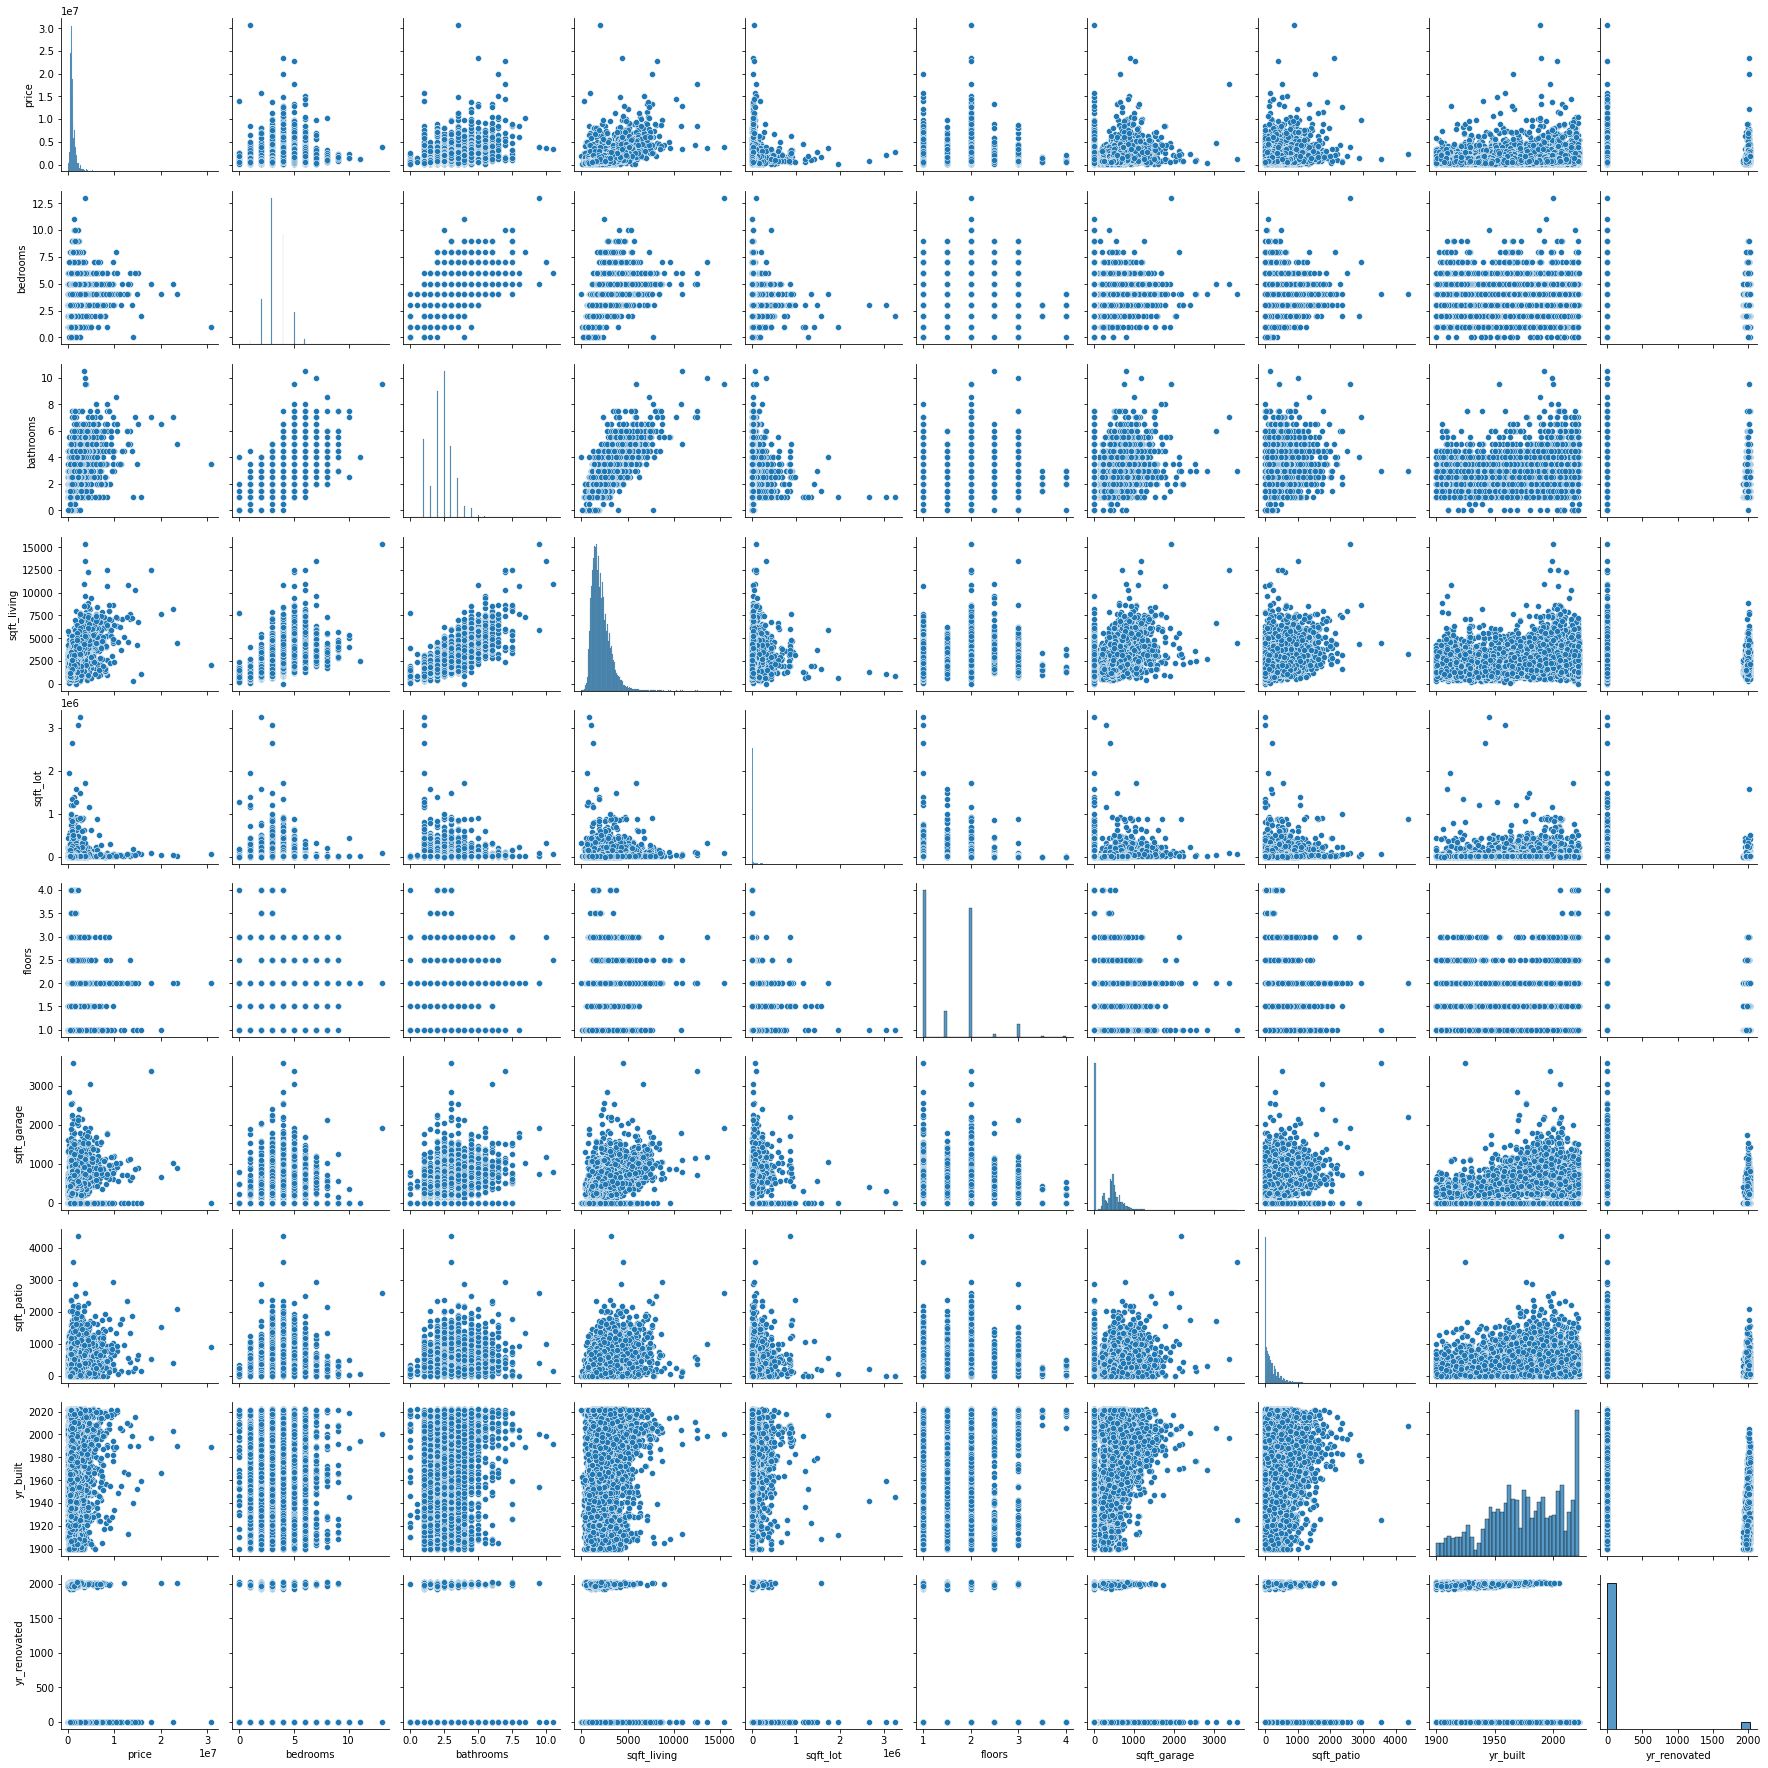

In [8]:
sns.pairplot(df)

<AxesSubplot:>

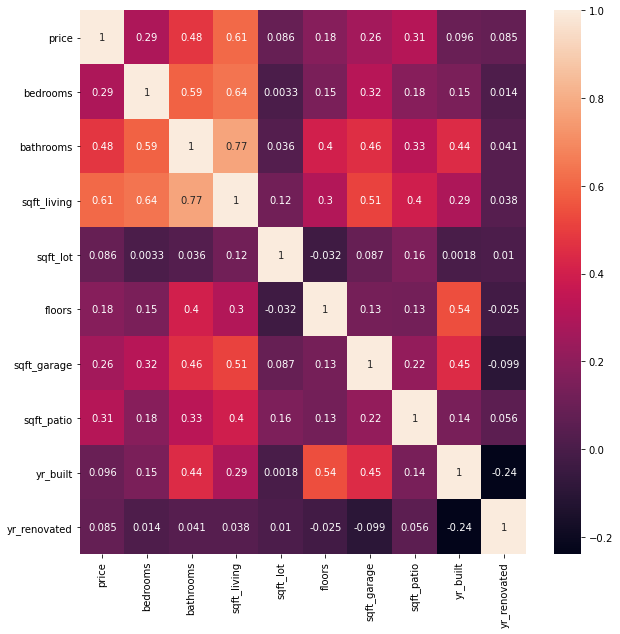

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

# Primary Data Transformations:

## 1. Create new variables:
 * a. land_to_building_ratio (land : lot)
 * b. bathroom : bedroom ratio
 
## 2. Convert these variables:
 * c. year renovated (binary - y/n)
 * d. view_binary (binary_ y/n)
 
## 3. Dummy Coding:
 * Condition (3 Categories)
 

## Secondary Variables:
 * bedroom/bathroom
 * basement



In [18]:
df['land_to_building_ratio'] = df['sqft_living'] / df['sqft_lot']

df['land_to_building_ratio'].describe()

count    30155.000000
mean         0.383072
std          0.374326
min          0.000009
25%          0.158024
50%          0.263158
75%          0.467590
max          3.573333
Name: land_to_building_ratio, dtype: float64

In [19]:
df['bed_bath_ratio'] = df['bedrooms']/df['bathrooms']

In [20]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated',
       'land_to_building_ratio', 'bed_bath_ratio'],
      dtype='object')

In [37]:
df['yr_renovated'].value_counts()

df['renovated'] = df['yr_renovated']

df['renovated'].mask(df['renovated']>0, 1, inplace=True)

In [44]:
df.view.value_counts()

df['view_binary'] = df['view'].mask(df['view'] == 'NONE', 0)
df['view_binary'] = df['view'].mask(df['view'] != 'NONE', 1)

df['view_binary'].mask(df['view'] == 'NONE',0, inplace = True)

df['view_binary'].value_counts()

0    26589
1     3566
Name: view_binary, dtype: int64

In [52]:
# Ignore this

df['condition'].value_counts()

def condition_numeric(condition):
    if condition == 'Poor':
        return 0
    elif condition == 'Fair':
        return 0
    elif condition == 'Average':
        return 1
    elif condition == 'Good':
        return 2
    elif condition == 'Very Good':
        return 3

df['condition_num'] = df['condition'].apply(condition_numeric)

df['condition_num'].value_counts(sort=True)

1    18547
2     8054
3     3259
0      295
Name: condition_num, dtype: int64

In [56]:
df['condition'].mask(df['condition'] == 'Poor', 'Below Average', inplace = True)

df['condition'].mask(df['condition'] == 'Fair', 'Below Average', inplace = True)

df['condition'].value_counts()

Average          18547
Good              8054
Very Good         3259
Below Average      295
Name: condition, dtype: int64

In [66]:
df = pd.get_dummies(df, prefix='cond',columns=['condition'])


df.head()

KeyError: "None of [Index(['condition'], dtype='object')] are in the [columns]"

In [67]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'grade', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'land_to_building_ratio',
       'bed_bath_ratio', 'renovated', 'view_binary', 'condition_num',
       'cond_Average', 'cond_Below Average', 'cond_Good', 'cond_Very Good'],
      dtype='object')

In [69]:
df = df.drop(labels = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'grade', 'sqft_garage', 'sqft_patio', 'yr_renovated'], axis=1)

df.columns

Index(['price', 'sqft_living', 'waterfront', 'greenbelt', 'nuisance',
       'yr_built', 'land_to_building_ratio', 'bed_bath_ratio', 'renovated',
       'view_binary', 'condition_num', 'cond_Average', 'cond_Below Average',
       'cond_Good', 'cond_Very Good'],
      dtype='object')

In [78]:
df = df.drop(labels = ['condition_num'], axis=1)

***

<AxesSubplot:>

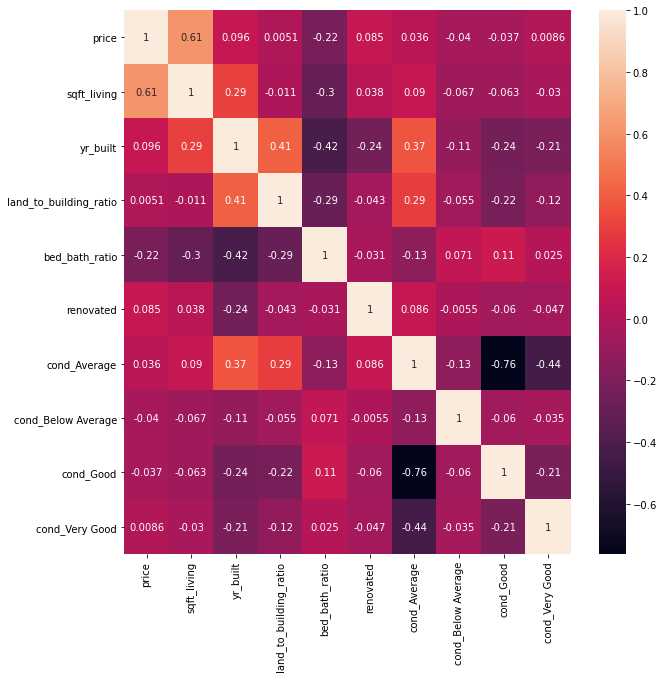

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

** Year built looks like multicollinearity problem. Will keep in dataset but drop from Xvars

In [89]:
df = df.drop('cond_Below Average', axis=1)

In [117]:
X_vars = df.drop(['price', 'yr_built', 'waterfront', 'greenbelt', 'nuisance'], axis=1)

In [118]:
X_vars.dropna(inplace=True)

In [121]:
lm2 = sm.OLS(y,X_vars).fit().summary()



ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

sqft_living                0
land_to_building_ratio     0
bed_bath_ratio            25
renovated                  0
view_binary                0
cond_Average               0
cond_Good                  0
cond_Very Good             0
dtype: int64

In [105]:
X_vars.columns

Index(['sqft_living', 'land_to_building_ratio', 'bed_bath_ratio', 'renovated',
       'view_binary', 'cond_Average', 'cond_Good', 'cond_Very Good'],
      dtype='object')